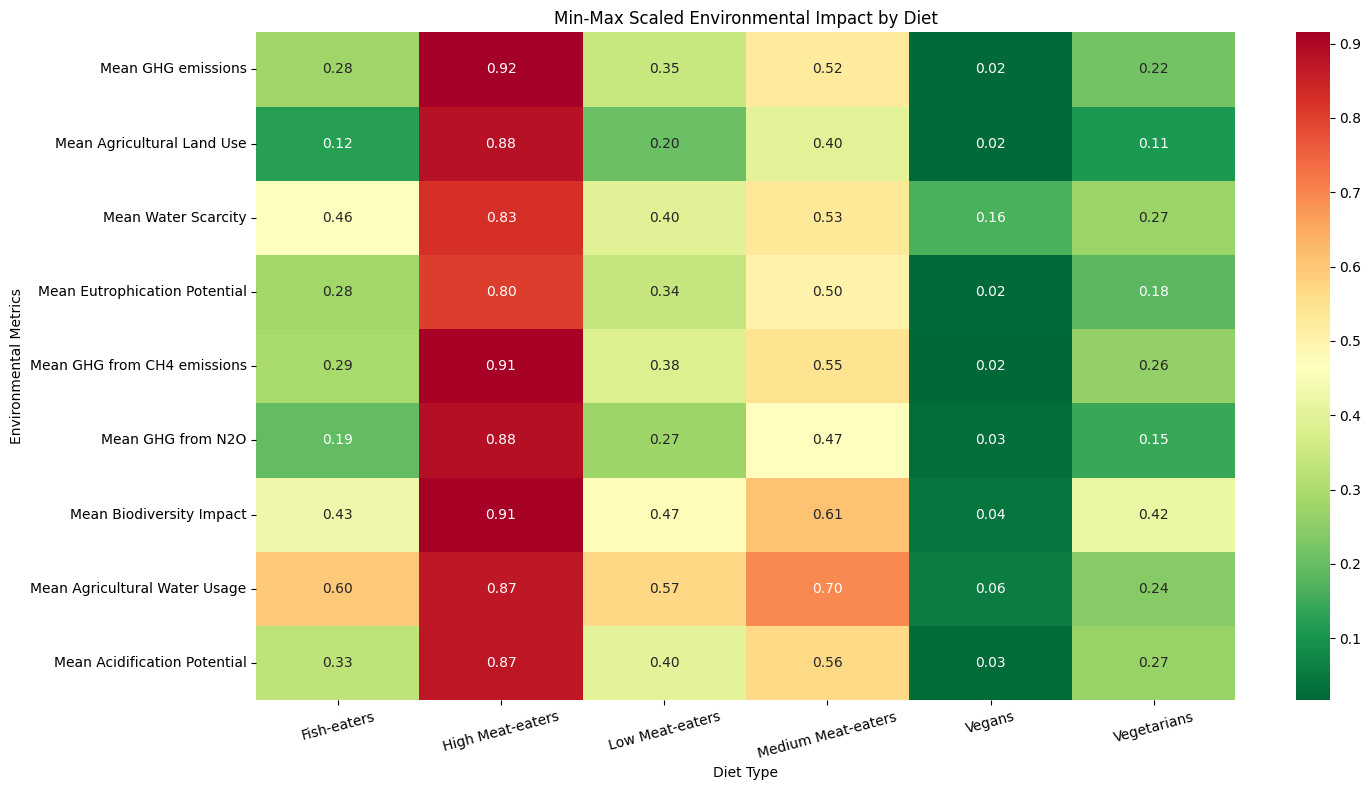

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

# Load data
df = pd.read_csv('Data_CW.csv', encoding='cp1252')

# Min-Max scaling
numerical_cols = df.columns[3:]
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 1. Environmental Impact Heatmap (Min-Max Scaled)
plt.figure(figsize=(15, 8))
diet_means = df_scaled.groupby('Type of Diet')[numerical_cols].mean()
sns.heatmap(diet_means.T, cmap='RdYlGn_r', annot=True, fmt=".2f")
plt.title('Min-Max Scaled Environmental Impact by Diet')
plt.xlabel('Diet Type')
plt.ylabel('Environmental Metrics')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 2. Consolidated Radar Chart for Diets
metrics = ['Mean GHG emissions',
           'Mean Agricultural Land Use',
           'Mean Water Scarcity',
           'Mean Eutrophication Potential',
           'Mean Agricultural Water Usage',
           'Mean Biodiversity Impact',
           'Mean Acidification Potential']

diet_means = df_scaled.groupby('Type of Diet')[metrics].mean().reset_index()

# Create radar chart
fig = go.Figure()

# colors = px.colors.qualitative.Plotly
colors = ['#01befe', '#ffdd00', '#ff7d00', '#ff006d', '#adff02', '#8f00ff']
# colours

for i, diet in enumerate(diet_means['Type of Diet']):
    fig.add_trace(go.Scatterpolar(
        r=diet_means[diet_means['Type of Diet'] == diet][metrics].values[0],
        theta=metrics,
        fill='toself',
        name=diet,
        line=dict(color=colors[i]),
        opacity=0.5,
        hoverinfo='name+r',
        hovertemplate="<b>%{theta}</b>: %{r:.2f}<extra></extra>"
    ))

# Configure layout
fig.update_layout(
    title=dict(
        text='Diet Environmental Impact Comparison<br><sup>Min-Max Scaled Metrics</sup>',
        x=0.5,
        font=dict(size=20)
    ),
    legend=dict(
        y=1.1,
        x=0.9,
        font=dict(size=12)
    ),
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=10)
        ),
        angularaxis=dict(
            tickfont=dict(size=12),
            direction='clockwise'
        )
    ),
    margin=dict(l=100, r=100, t=100, b=100),
    height=700,
    width=900
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('Data_CW.csv')

# Define metric categories
category_mapping = {
    'Greenhouse Gas': ['Mean GHG emissions', 'Mean GHG from CH4 emissions', 'Mean GHG from N2O'],
    'Land Use': ['Mean Agricultural Land Use'],
    'Water Impact': ['Mean Water Scarcity', 'Mean Agricultural Water Usage'],
    'Eutrophication': ['Mean Eutrophication Potential'],
    'Biodiversity': ['Mean Biodiversity Impact'],
    'Acidification': ['Mean Acidification Potential']
}

# Min-Max scaling
metrics = [col for col in df.columns if col not in [
    'Type of Diet', 'Gender', 'Age Group']]
scaler = MinMaxScaler()
df[metrics] = scaler.fit_transform(df[metrics])

# Melt and categorize
melted_df = df.melt(
    id_vars=['Type of Diet', 'Gender', 'Age Group'],
    value_vars=metrics,
    var_name='Metric',
    value_name='Scaled Value'
)
melted_df['Category'] = melted_df['Metric'].apply(
    lambda x: next((k for k, v in category_mapping.items() if x in v), 'Other')
)

# Aggregate data
aggregated_df = melted_df.groupby(
    ['Category', 'Type of Diet', 'Gender', 'Age Group', 'Metric']
)['Scaled Value'].mean().reset_index()

# Create enlarged treemap
fig = px.treemap(
    aggregated_df,
    path=['Category', 'Type of Diet', 'Gender', 'Age Group', 'Metric'],
    values='Scaled Value',
    color='Scaled Value',
    color_continuous_scale='RdYlGn_r',
    title='Environmental Impact Hierarchy (Scaled & Aggregated)',
    hover_data={'Scaled Value': ':.2f'}
)

# Size and layout adjustments
fig.update_layout(
    margin=dict(t=40, l=5, r=5, b=5),
    width=1600,  # Increased width
    height=900,  # Increased height
    autosize=False,
    coloraxis_colorbar=dict(
        title='Impact Level',
        thickness=20,
        len=0.8
    )
)

# Enable fullscreen capability
fig.update_layout(
    template='plotly_white',
    hoverlabel=dict(
        bgcolor="white",
        font_size=14
    )
)

# Show with configuration for fullscreen button
fig.show(config={'scrollZoom': True, 'displayModeBar': True})
fig.write_image("fig1.png")